In [2]:
import requests
api_key = "JU19JUO8DWYUIT4T"
url = "https://www.alphavantage.co/query"
params = {
    "function": "TIME_SERIES_INTRADAY",
    "symbol": "GOOG",
    "interval": "1min",
    "apikey": api_key,
}

response = requests.get(url, params=params)
data = response.json()
print(data)


{'Meta Data': {'1. Information': 'Intraday (1min) open, high, low, close prices and volume', '2. Symbol': 'GOOG', '3. Last Refreshed': '2024-12-11 19:59:00', '4. Interval': '1min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (1min)': {'2024-12-11 19:59:00': {'1. open': '198.3200', '2. high': '198.3800', '3. low': '198.3000', '4. close': '198.3000', '5. volume': '662'}, '2024-12-11 19:58:00': {'1. open': '198.3000', '2. high': '198.3200', '3. low': '198.3000', '4. close': '198.3100', '5. volume': '1589'}, '2024-12-11 19:57:00': {'1. open': '198.2100', '2. high': '198.3000', '3. low': '198.2100', '4. close': '198.3000', '5. volume': '2449'}, '2024-12-11 19:56:00': {'1. open': '198.2900', '2. high': '198.3000', '3. low': '198.2100', '4. close': '198.3000', '5. volume': '337'}, '2024-12-11 19:55:00': {'1. open': '198.3200', '2. high': '198.3200', '3. low': '198.2127', '4. close': '198.3200', '5. volume': '264'}, '2024-12-11 19:54:00': {'1. open': '198.2245', '2

In [1]:
import requests
import json

def fetch_intraday_data(symbol, interval, api_key):
    url = "https://www.alphavantage.co/query"
    params = {
        "function": "TIME_SERIES_INTRADAY",
        "symbol": symbol,
        "interval": interval,
        "apikey": api_key,
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        raise Exception(f"Erreur lors de la requête API: {response.status_code}")

def extract_clean_data(raw_data):
    if "Time Series (1min)" not in raw_data:
        raise Exception("Format de données inattendu, vérifiez la réponse de l'API.")
    
    time_series = raw_data["Time Series (1min)"]
    clean_data = []
    
    for timestamp, values in time_series.items():
        clean_data.append({
            "timestamp": timestamp,
            "close": float(values["4. close"]),
            "volume": int(values["5. volume"]),
        })
    
    clean_data = sorted(clean_data, key=lambda x: x["timestamp"])
    return clean_data

def main():
    api_key = "JU19JUO8DWYUIT4T"
    symbol = "GOOG"
    interval = "1min"
    
    try:
        print("Récupération des données brutes depuis Alpha Vantage...")
        raw_data = fetch_intraday_data(symbol, interval, api_key)
        
        print("Extraction et nettoyage des données...")
        clean_data = extract_clean_data(raw_data)
        
        print("Données nettoyées:")
        for entry in clean_data[:5]: 
            print(entry)
        
        with open(f"{symbol}_clean_data.json", "w") as f:
            json.dump(clean_data, f, indent=4)
        print(f"Données sauvegardées dans {symbol}_clean_data.json")
    
    except Exception as e:
        print(f"Erreur: {e}")

if __name__ == "__main__":
    main()


Récupération des données brutes depuis Alpha Vantage...
Extraction et nettoyage des données...
Données nettoyées:
{'timestamp': '2024-12-11 18:20:00', 'close': 197.49, 'volume': 1037}
{'timestamp': '2024-12-11 18:21:00', 'close': 197.26, 'volume': 651}
{'timestamp': '2024-12-11 18:22:00', 'close': 197.31, 'volume': 8495}
{'timestamp': '2024-12-11 18:23:00', 'close': 197.35, 'volume': 92444}
{'timestamp': '2024-12-11 18:24:00', 'close': 197.51, 'volume': 4288}
Données sauvegardées dans GOOG_clean_data.json


Chargement des données nettoyées...
Visualisation des données...


/var/folders/gr/37ts_6nn34qbcw22dqxnvqx80000gn/T/ipykernel_5512/2286005618.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


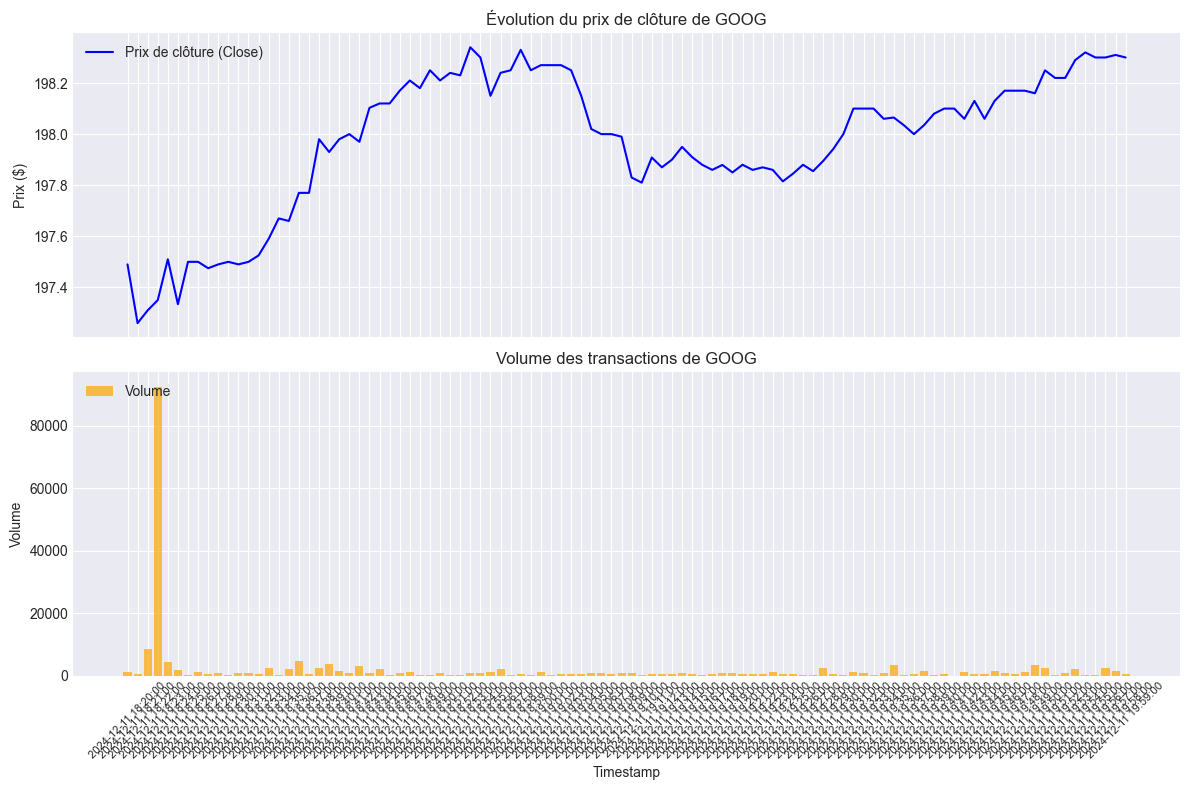

In [3]:
import json
import matplotlib.pyplot as plt

def load_clean_data(file_path):
    with open(file_path, "r") as f:
        data = json.load(f)
    return data

def visualize_data(clean_data):
    timestamps = [entry["timestamp"] for entry in clean_data]
    close_prices = [entry["close"] for entry in clean_data]
    volumes = [entry["volume"] for entry in clean_data]

    plt.style.use("seaborn-darkgrid")

    fig, ax1 = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
 
    ax1[0].plot(timestamps, close_prices, label="Prix de clôture (Close)", color="blue")
    ax1[0].set_title("Évolution du prix de clôture de GOOG")
    ax1[0].set_ylabel("Prix ($)")
    ax1[0].legend(loc="upper left")

    ax1[1].bar(timestamps, volumes, label="Volume", color="orange", alpha=0.7)
    ax1[1].set_title("Volume des transactions de GOOG")
    ax1[1].set_ylabel("Volume")
    ax1[1].set_xlabel("Timestamp")
    ax1[1].legend(loc="upper left")

    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()

    plt.show()

def main():
    clean_data_file = "GOOG_clean_data.json" 
    
    try:
        print("Chargement des données nettoyées...")
        clean_data = load_clean_data(clean_data_file)
        
        print("Visualisation des données...")
        visualize_data(clean_data)
    
    except Exception as e:
        print(f"Erreur: {e}")

if __name__ == "__main__":
    main()
